In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
tf.keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
import matplotlib.pyplot as plt

In [9]:
i = 1000

In [10]:
img = x_train[i]

In [11]:
img.shape

(28, 28)

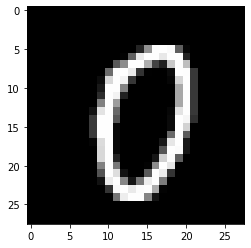

In [12]:
plt.imshow(img, cmap='gray')

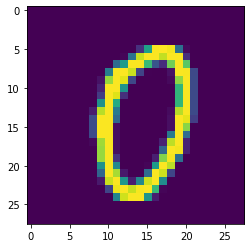

In [13]:
plt.imshow(img)

# Preprocessing

In [14]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)  # 4D to work with Convolution layer (keras)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)  # 1 for gray scale
input_shape = (28, 28, 1)

In [15]:
x_train.shape

(60000, 28, 28, 1)

In [16]:
x_test.shape

(10000, 28, 28, 1)

In [17]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255 # to convert in range [0,1]

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=input_shape))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.add(Dense(units=128, activation=tf.nn.relu))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
Total params: 606,104
Trainable params: 606,104
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.add(Dropout(0.2))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
Total params: 606,104
Trainable params: 606,104
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.add(Dense(units=10, activation=tf.nn.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [28]:
model.fit(x=x_train, y=y_train, epochs=1)

1875/1875 [==============================] - 21s 11ms/step - loss: 0.2083 - accuracy: 0.9378


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [30]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0797 - accuracy: 0.9733


[0.07973766326904297, 0.9732999801635742]

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [32]:
i = 100

In [33]:
pred = model.predict(x_test[i:i+5])
pred

array([[5.4229016e-04, 4.3130658e-06, 1.5683958e-04, 5.8926430e-06,
        3.4790392e-05, 5.0495713e-05, 9.9910897e-01, 6.6390487e-05,
        2.4265639e-05, 5.7735238e-06],
       [9.9990141e-01, 5.1672478e-06, 1.1987578e-05, 4.2811007e-07,
        7.3874240e-08, 1.0348771e-05, 4.9603565e-05, 1.8320783e-06,
        4.5487263e-06, 1.4502964e-05],
       [2.3595464e-10, 1.4792904e-09, 3.8512241e-10, 8.6557370e-04,
        7.0876714e-11, 9.9911898e-01, 2.1197363e-10, 1.4013342e-08,
        1.3843157e-05, 1.6401689e-06],
       [3.1033590e-08, 1.1262991e-06, 8.1385861e-06, 2.5014817e-06,
        9.9992836e-01, 5.8980440e-06, 4.9327578e-08, 3.9546230e-06,
        3.9640531e-07, 4.9597711e-05],
       [7.5798340e-07, 9.9079735e-08, 2.0033115e-06, 2.4565039e-04,
        7.9915371e-05, 4.1195977e-02, 1.5419002e-07, 1.4343131e-05,
        6.9057911e-05, 9.5839214e-01]], dtype=float32)

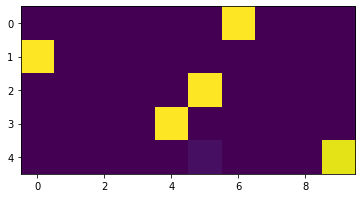

In [34]:
plt.imshow(pred)

In [35]:
for j in range(i, i+5):
    print(y_test[j])

6
0
5
4
9


In [36]:
pred[4] 

array([7.5798340e-07, 9.9079735e-08, 2.0033115e-06, 2.4565039e-04,
       7.9915371e-05, 4.1195977e-02, 1.5419002e-07, 1.4343131e-05,
       6.9057911e-05, 9.5839214e-01], dtype=float32)

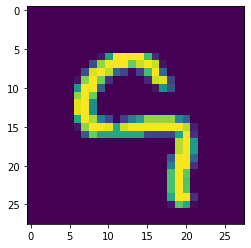

In [37]:
plt.imshow(x_test[i+4])